# Botanica Iris : Analyse Exploratoire en R

Ce notebook a pour objectif d’explorer le dataset **Iris** à l’aide de **R**, de produire des visualisations, d’identifier des tendances, et de fournir une synthèse statistique claire.

In [21]:
# Installer les packages manquants si besoin
packages <- c("GGally", "ggplot2", "dplyr", "tidyr", "corrplot", "kableExtra","ggforce")
install_if_missing <- function(p) {
  if (!requireNamespace(p, quietly = TRUE)) install.packages(p)
}
invisible(lapply(packages, install_if_missing))


In [22]:
#  Chargement des packages
library(tidyverse)
library(ggplot2)
library(GGally)
library(corrplot)
library(kableExtra)
library(ggforce)

## Étape 1 : Exploration des Données

In [23]:
# Chargement du dataset
data("iris")
head(iris)

# Aperçu structurel
str(iris)

# Aperçu visuel (fonction View seulement dans RStudio)
# View(iris)

# Noms des colonnes
names(iris)

# Espèces présentes
unique(iris$Species)

# Dimensions
dim(iris)

# Résumé statistique
summary(iris)

# Valeurs manquantes
colSums(is.na(iris))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

[1] 150   5

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
           0            0            0            0            0

###  Analyse du dataset et interpretation des statistiques descriptives
#### analyse du dataset
 Le jeu de données Iris contient 150 observations réparties équitablement en 3 espèces :
- setosa
- versicolor
- virginica
 Chaque fleur est décrite par 4 variables numériques :
 - Longueur et largeur du sépale (`Sepal.Length`, `Sepal.Width`)
 - Longueur et largeur du pétale (`Petal.Length`, `Petal.Width`)
### Analyse du résumé statistique :
Chaque variable s'etend entre des valeurs min et max:
- Sepal.Length : entre 4.3 et 7.9 cm, moyenne ≈ 5.84 cm
- Sepal.Width  : entre 2.0 et 4.4 cm, moyenne ≈ 3.06 cm
- Petal.Length : entre 1.0 et 6.9 cm, moyenne ≈ 3.76 cm
- Petal.Width  : entre 0.1 et 2.5 cm, moyenne ≈ 1.20 cm
Obeservations:
- Les pétales présentent des écarts beaucoup plus larges que les sépales,
  en particulier sur Petal.Length (écart : 5.9 cm).
- Cela indique une **plus grande variabilité** dans les dimensions des pétales,
   ce qui pourrait être utile pour distinguer les espèces.


## Étape 2 : Statistiques Descriptives & Corrélations

In [24]:
## Statistiques descriptives par espèce

# Setosa
setosa <- iris[iris$Species == "setosa", ]
summary(setosa)

# Versicolor
versicolor <- iris[iris$Species == "versicolor", ]
summary(versicolor)

# Virginica
virginica <- iris[iris$Species == "virginica", ]
summary(virginica)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       Species  
 setosa    :50  
 versicolor: 0  
 virginica : 0  
                
                
                

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.900   Min.   :2.000   Min.   :3.00   Min.   :1.000   setosa    : 0  
 1st Qu.:5.600   1st Qu.:2.525   1st Qu.:4.00   1st Qu.:1.200   versicolor:50  
 Median :5.900   Median :2.800   Median :4.35   Median :1.300   virginica : 0  
 Mean   :5.936   Mean   :2.770   Mean   :4.26   Mean   :1.326                  
 3rd Qu.:6.300   3rd Qu.:3.000   3rd Qu.:4.60   3rd Qu.:1.500                  
 Max.   :7.000   Max.   :3.400   Max.   :5.10   Max.   :1.800                  

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.900   Min.   :2.200   Min.   :4.500   Min.   :1.400  
 1st Qu.:6.225   1st Qu.:2.800   1st Qu.:5.100   1st Qu.:1.800  
 Median :6.500   Median :3.000   Median :5.550   Median :2.000  
 Mean   :6.588   Mean   :2.974   Mean   :5.552   Mean   :2.026  
 3rd Qu.:6.900   3rd Qu.:3.175   3rd Qu.:5.875   3rd Qu.:2.300  
 Max.   :7.900   Max.   :3.800   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    : 0  
 versicolor: 0  
 virginica :50  
                
                
                

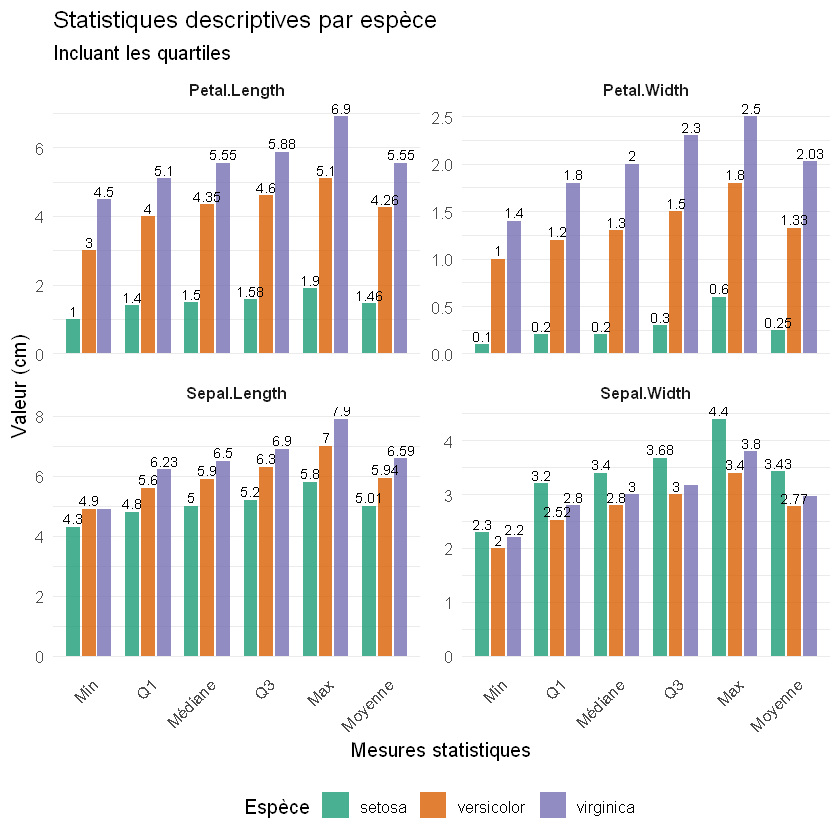

In [25]:
# Visualistion des Statistiques descriptives par espèce
# Calcul des statistiques pour les variables souhaitées
stats <- iris %>%
  group_by(Species) %>%
  summarise(across(
    c(Petal.Length, Petal.Width, Sepal.Length, Sepal.Width),
    list(
      Min = ~min(.),
      Q1 = ~quantile(., 0.25),
      Médiane = ~median(.),
      Q3 = ~quantile(., 0.75),
      Max = ~max(.),
      Moyenne = ~mean(.)
    ),
    .names = "{.col}_{.fn}"
  )) %>%
  pivot_longer(-Species, names_to = "stat", values_to = "value") %>%
  separate(stat, into = c("Variable", "Statistique"), sep = "_") %>%
  mutate(Statistique = factor(Statistique,
                              levels = c("Min", "Q1", "Médiane", "Q3", "Max", "Moyenne")))

# Visualisation en barres
ggplot(stats, aes(x = Statistique, y = value, fill = Species)) +
  geom_col(position = position_dodge(width = 0.8), width = 0.7, alpha = 0.8) +
  facet_wrap(~Variable, scales = "free_y", ncol = 2) +
  scale_fill_manual(values = c("setosa" = "#1b9e77",
                               "versicolor" = "#d95f02",
                               "virginica" = "#7570b3")) +
  labs(
    title = "Statistiques descriptives par espèce",
    subtitle = "Incluant les quartiles",
    x = "Mesures statistiques",
    y = "Valeur (cm)",
    fill = "Espèce"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom",
    panel.grid.major.x = element_blank(),
    strip.text = element_text(face = "bold")
  ) +
  geom_text(
    aes(label = round(value, 2)),
    position = position_dodge(width = 0.8),
    vjust = -0.3,
    size = 3,
    check_overlap = TRUE
  )



##  Interprétation des variables par espèce

 Sepal.Length
  - Setosa : entre 4.3 et 5.8 cm, moyenne ≈ 5.01
  - Versicolor : entre 4.9 et 7.0 cm, moyenne ≈ 5.94
  - Virginica : entre 4.9 et 7.9 cm, moyenne ≈ 6.59
Interprétation :
 La longueur des sépales augmente en moyenne d'une espèce à l'autre.
 Elle peut être utilisée pour distinguer Virginica des autres,
 mais Setosa et Versicolor présentent un léger recouvrement.

 Sepal.Width
 - Setosa : entre 2.3 et 4.4 cm, moyenne ≈ 3.43
 - Versicolor : entre 2.0 et 3.4 cm, moyenne ≈ 2.77
 - Virginica : entre 2.2 et 3.8 cm, moyenne ≈ 2.97
 Interprétation :
 Setosa a des sépales plus larges en moyenne que les autres espèces.  
 Bien qu'il y ait un recouvrement, cette variable peut aider à distinguer Setosa.

 Petal.Length
 - Setosa : entre 1.0 et 1.9 cm, moyenne ≈ 1.46
 - Versicolor : entre 3.0 et 5.1 cm, moyenne ≈ 4.26
 - Virginica : entre 4.5 et 6.9 cm, moyenne ≈ 5.55
 Interprétation :
 Les longueurs des pétales sont **très bien séparées** selon les espèces.
 Setosa est clairement isolée (aucune valeur au-dessus de 1.9),
 ce qui rend cette variable extrêmement utile pour la classification.

 Petal.Width
 - Setosa : entre 0.1 et 0.6 cm, moyenne ≈ 0.25
 - Versicolor : entre 1.0 et 1.8 cm, moyenne ≈ 1.33
 - Virginica : entre 1.4 et 2.5 cm, moyenne ≈ 2.03
Interprétation :
 Aucune valeur de `Petal.Width` de Setosa ne se recoupe avec celles de Versicolor et Virginica.
 C’est **la variable la plus discriminante** pour séparer Setosa des deux autres espèces.

 Conclusion générale :  
➤ Les deux variables les plus discriminantes sont `Petal.Length` et `Petal.Width`.  
➤ Elles permettent une séparation quasi-parfaite des trois espèces.  
➤ `Sepal.Length` et `Sepal.Width` sont utiles mais présentent davantage de recouvrement.  


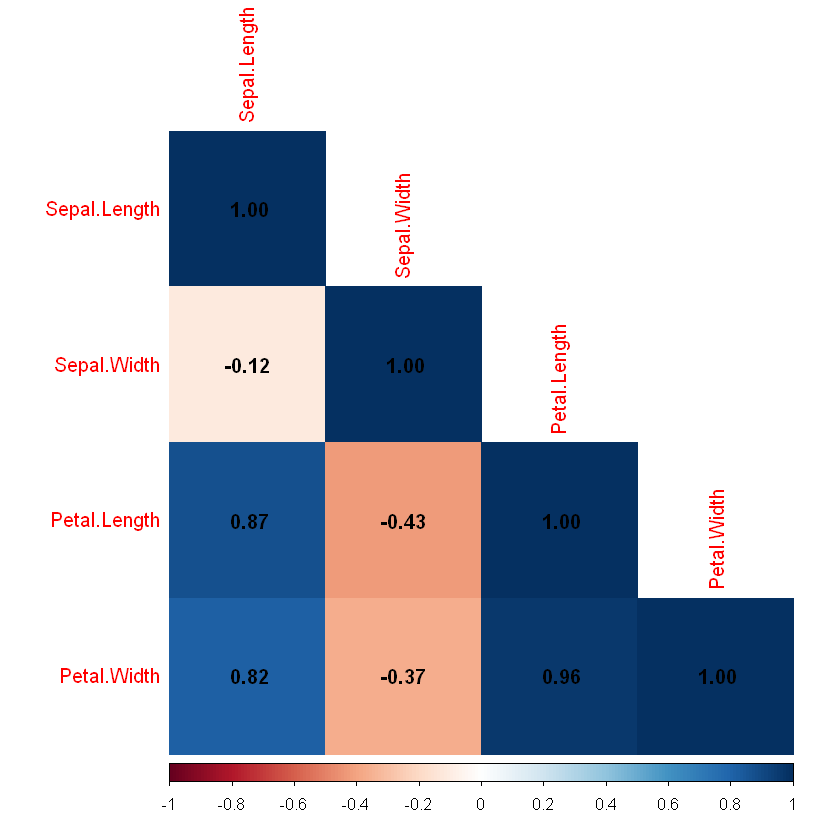

In [26]:
# Matrice de corrélation
cor_matrix <- cor(iris[,1:4])
corrplot(cor_matrix, method = "color", type = "lower", addCoef.col = "black")

## Interprétation Corrélation entre variables (Pearson)

 ➤ Corrélation très forte : 
   - `Petal.Length` et `Petal.Width` : **r = 0.96**
     Cela indique une relation linéaire presque parfaite :
     les fleurs ayant de longs pétales ont aussi des pétales larges.

 ➤ Corrélations fortes :
   - `Sepal.Length` et `Petal.Length` : **r = 0.87**
   - `Sepal.Length` et `Petal.Width` : **r = 0.82**
     Ces relations suggèrent que la taille du sépale est globalement liée à la taille du pétale.
     Cela peut être exploité dans des modèles prédictifs.

➤ Corrélations faibles ou négatives :
   - `Sepal.Width` et les autres variables :
   - `Sepal.Width` vs `Sepal.Length` : **r = -0.12**
   - `Sepal.Width` vs `Petal.Length` : **r = -0.43**
   - `Sepal.Width` vs `Petal.Width`  : **r = -0.37**
 Cela signifie que les fleurs ayant de larges sépales n’ont pas nécessairement de grands pétales.

### Conclusion :
 Les variables `Petal.Length` et `Petal.Width` sont non seulement fortement corrélées entre elles,
 mais aussi très utiles pour discriminer les espèces.  
 `Sepal.Width`, en revanche, est moins informatif.


## Étape 3 : Visualisations

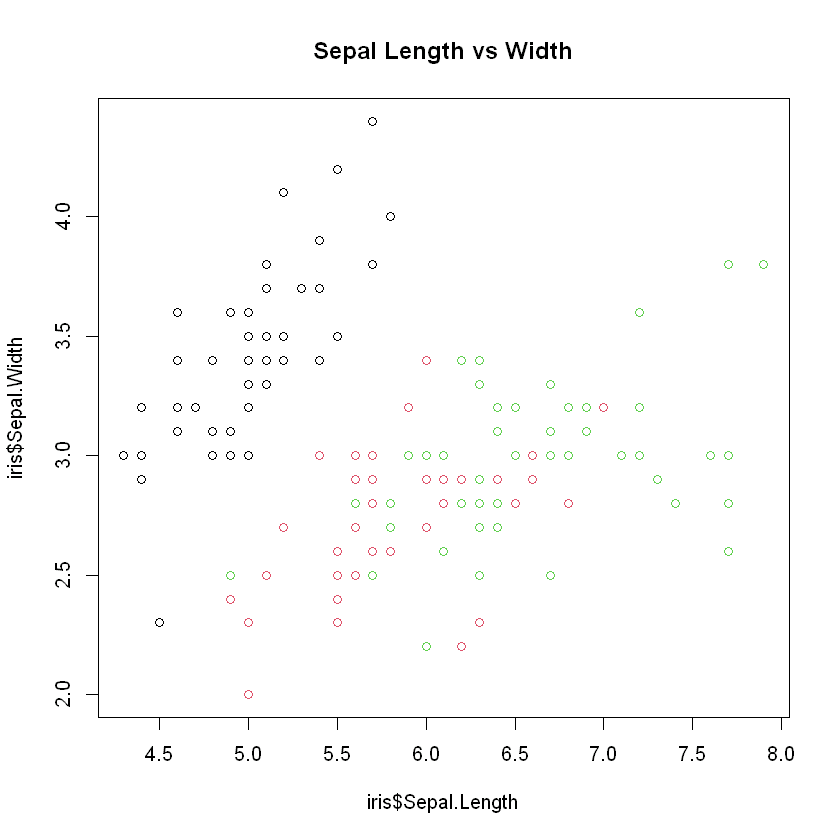

In [27]:
# Scatter plot sepal Length vs Width
plot(iris$Sepal.Length, iris$Sepal.Width,
     col = iris$Species,
     main = "Sepal Length vs Width")

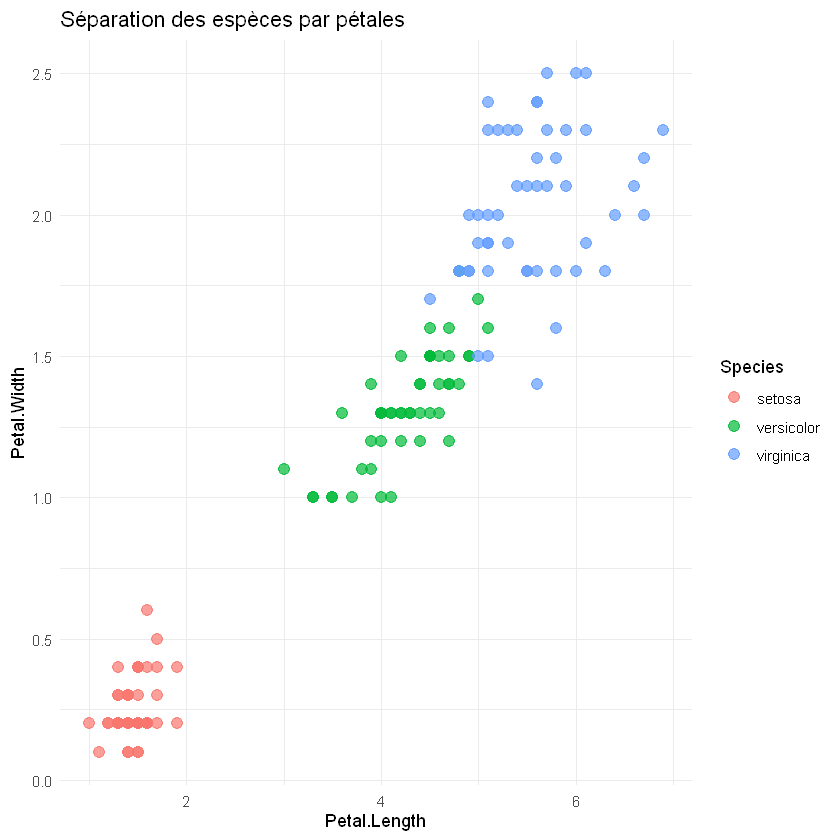

In [28]:
# Scatter plot : Petal.Length vs Petal.Width
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
  geom_point(size = 3, alpha = 0.7) +
  theme_minimal() +
  labs(title = "Séparation des espèces par pétales")

### Comparaison des visualisations : sépales vs pétales

 Graphe 1 : Sepal.Length vs Sepal.Width
 - Seule l'espèce Setosa (points foncés) forme un groupe identifiable (courts sépales larges).
 - Versicolor et Virginica se chevauchent fortement.
  Conclusion : les dimensions des sépales **ne permettent pas** de séparer clairement les trois espèces.

 Graphe 2 : Petal.Length vs Petal.Width
 - Setosa est nettement isolée en bas à gauche du graphique.
 - Versicolor et Virginica forment deux groupes bien séparés malgré une zone de transition.
  Conclusion : les dimensions des pétales permettent une **classification quasi-parfaite**.

### conclusion

 ➤ Les variables liées aux **pétales** (longueur et largeur) sont bien plus discriminantes
     que celles des sépales pour différencier les trois espèces de fleurs.

 ➤ Cette analyse visuelle confirme les résultats de la **corrélation** et des **statistiques descriptives** :
     `Petal.Length` et `Petal.Width` sont les meilleurs candidats pour identifier les differentes especes.




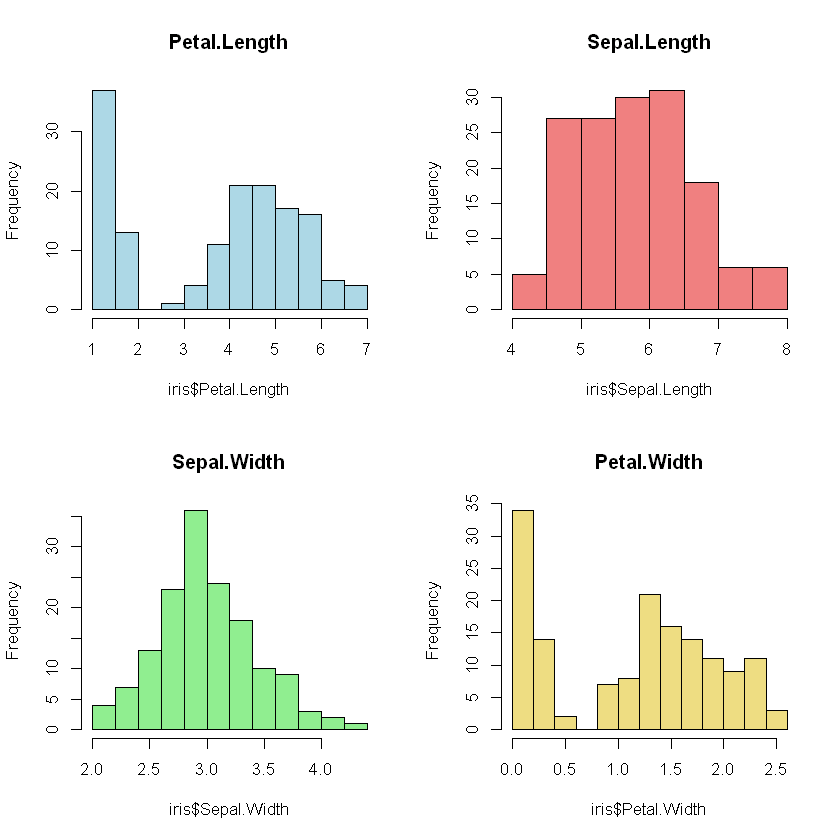

In [29]:
# Histogrammes globaux pour chaque variable numérique
par(mfrow = c(2, 2))  # Affiche 4 graphiques (2 lignes x 2 colonnes)

hist(iris$Petal.Length, breaks = 10, col = "lightblue", main = "Petal.Length")
hist(iris$Sepal.Length, breaks = 10, col = "lightcoral", main = "Sepal.Length")
hist(iris$Sepal.Width,  breaks = 10, col = "lightgreen", main = "Sepal.Width")
hist(iris$Petal.Width,  breaks = 10, col = "lightgoldenrod", main = "Petal.Width")

par(mfrow = c(1, 1))  # Réinitialise l'affichage graphique


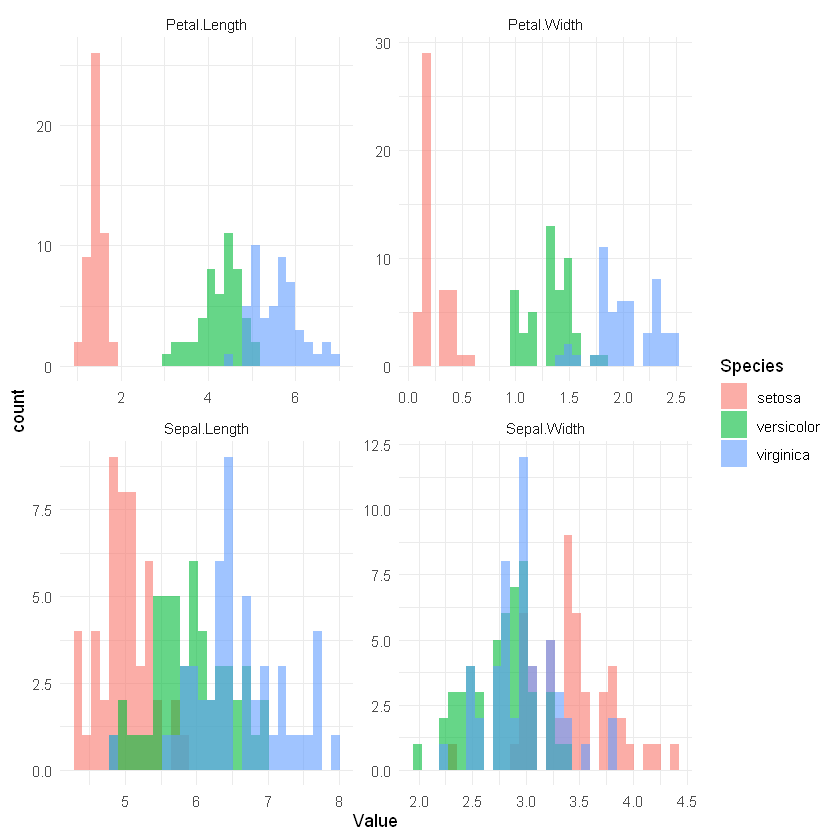

In [30]:
# Histogrammes empilés par espèce pour chaque variable 
iris %>%
  pivot_longer(cols = -Species, names_to = "Variable", values_to = "Value") %>%
  ggplot(aes(x = Value, fill = Species)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 30) +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal()

### Comparaison des histogrammes globaux et empilés

#### Histogrammes globaux :
 ➤ Ils montrent la **répartition générale** de chaque variable pour l'ensemble du jeu de données.  
 ➤ Petal.Length a une distribution clairement multimodale, suggérant plusieurs groupes.  
 ➤ Sepal.Length est plus symétrique, mais légèrement étalé.  
 ➤ Petal.Width a une grande concentration autour de faibles valeurs (≤ 0.5), signe d'une espèce très différente.  
 ➤ Sepal.Width est plus centré autour de 3.0, sans pic extrême.  

 Limite : ces graphiques **ne montrent pas les différences entre espèces**, car les données sont toutes mélangées.  



#### Histogrammes empilés par espèce:
 ➤ Ils permettent de visualiser la **répartition des valeurs pour chaque variable, selon l’espèce** :  
    - `Setosa` (rose) → très regroupée et souvent isolée  
    - `Versicolor` (vert) → distributions modérées  
    - `Virginica` (bleu) → valeurs plus étalées vers le haut  

 ➤ Petal.Length et Petal.Width :  
    - Très forte séparation des espèces  
    - Aucune superposition entre Setosa et les deux autres → **très discriminantes**  

 ➤ Sepal.Length :  
    - Les distributions de Versicolor et Virginica se chevauchent  
    - Setosa est plus concentrée dans les petites longueurs  

 ➤ Sepal.Width :  
    - Moins discriminante, car les 3 espèces présentent des valeurs qui se recoupent  



### Conclusion  

 ➤ Les histogrammes globaux sont utiles pour une **vue d’ensemble** de la distribution,
     mais **ne permettent pas de distinguer les espèces**.  

 ➤ Les histogrammes empilés par espèce révèlent que :  
      `Petal.Length` et `Petal.Width` sont **parfaitement adaptées à la classification**.  
      `Sepal.Length` et surtout `Sepal.Width` sont **moins discriminantes**.  
      
Ces observations renforcent les conclusions déjà faites sur la **pertinence des variables des pétales**  



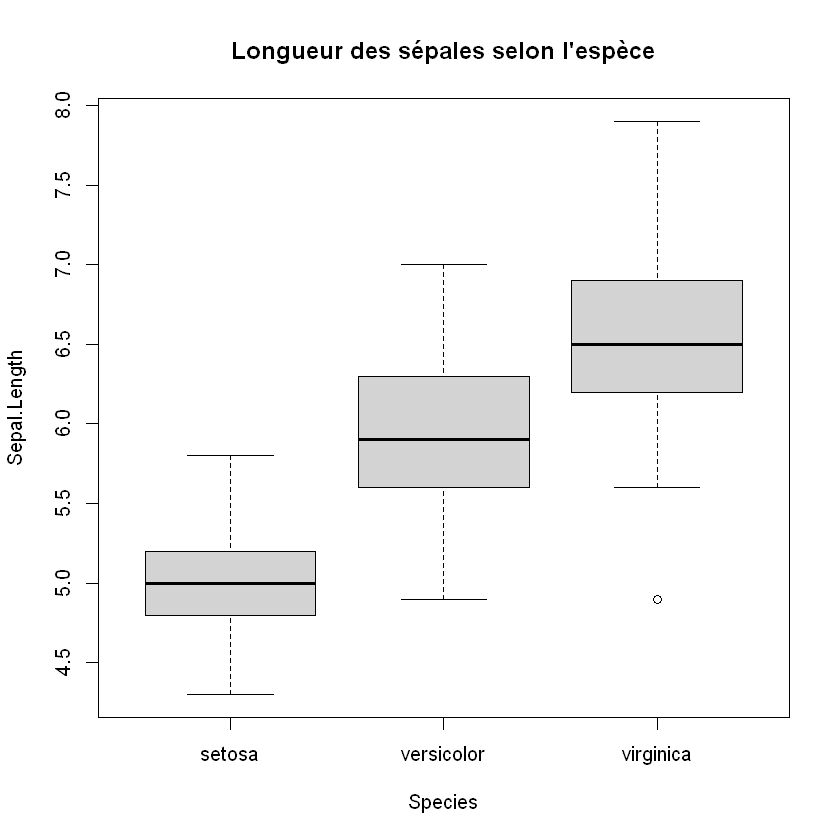

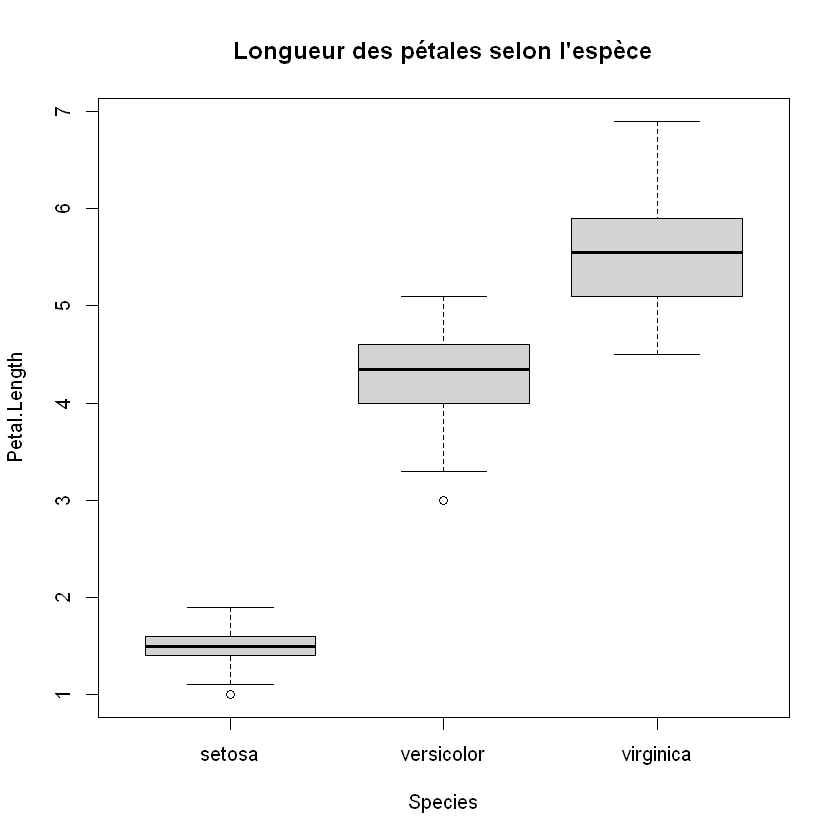

In [14]:
# Boxplot
boxplot(Sepal.Length ~ Species, data = iris,
        main = "Longueur des sépales selon l'espèce")
boxplot(Petal.Length ~ Species, data = iris,
        main = "Longueur des pétales selon l'espèce")

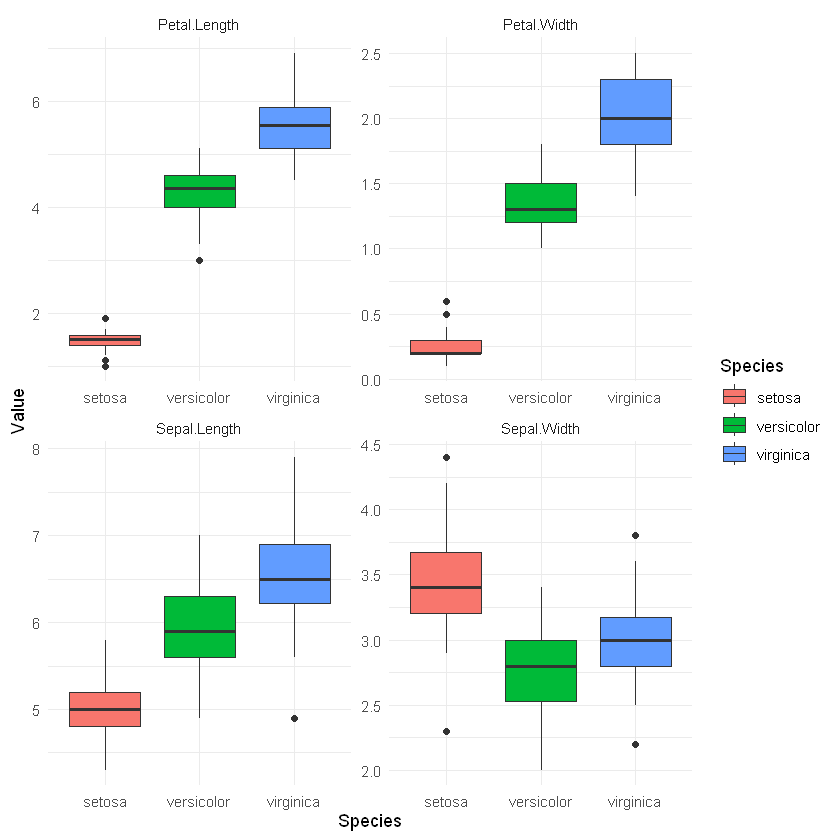

In [15]:
# Boxplots
iris %>%
  pivot_longer(cols = -Species, names_to = "Variable", values_to = "Value") %>%
  ggplot(aes(x = Species, y = Value, fill = Species)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal()

#### Interprétation des boxplots 

 Boxplots simples  

 ➤ Sepal.Length :  
     - Moyenne croissante : setosa < versicolor < virginica  
     - Mais recouvrement important entre versicolor et virginica  
     - Quelques valeurs atypiques (outliers) observées  

 ➤ Petal.Length :  
     - Setosa a des longueurs très faibles et très concentrées (~1.4 cm).  
     - Virginica : les plus longues (~5.5 à 6.9 cm).  
     - Versicolor : au milieu.   
     - Très peu de recouvrement  (variable très discriminante  ).    


 Boxplots groupés pour les 4 variables  

 ➤ Petal.Width :  
     - Séparation parfaite entre les espèces, surtout Setosa vs les autres  
     - Virginica domine largement en largeur de pétales  

 ➤ Sepal.Width :  
     - Grande variabilité dans chaque groupe, recouvrement entre espèces  
     - Variable **moins discriminante**  

 ➤ Globalement :  
     - `Petal.Length` et `Petal.Width` montrent une séparation nette entre les 3 espèces  
     - `Sepal.Length` est modérément discriminant  
     - `Sepal.Width` est le moins utile pour différencier les espèces  


#### Conclusion  

 ➤ Les boxplots confirment :  
      `Petal.Length` et `Petal.Width` sont des variables **fortement discriminantes**.  
      `Sepal.Width` apporte peu d’information discriminante.  
 ➤ Ces visualisations renforcent l'idée que les dimensions des **pétales** sont  
     les plus pertinentes pour une classification.  


## Introduction de la variable ratio entre pétal.length/petal.width

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,7.00
2,4.9,3.0,1.4,0.2,setosa,7.00
3,4.7,3.2,1.3,0.2,setosa,6.50
4,4.6,3.1,1.5,0.2,setosa,7.50
5,5.0,3.6,1.4,0.2,setosa,7.00
6,5.4,3.9,1.7,0.4,setosa,4.25


Species,Ratio
<fct>,"<dbl[,6]>"
setosa,"2.666667, 4.687500, 7.000000, 6.908000, 7.500000, 15.0"
versicolor,"2.666667, 3.016667, 3.240385, 3.242837, 3.417582, 4.1"
virginica,"2.125000, 2.511364, 2.666667, 2.780662, 3.055556, 4.0"


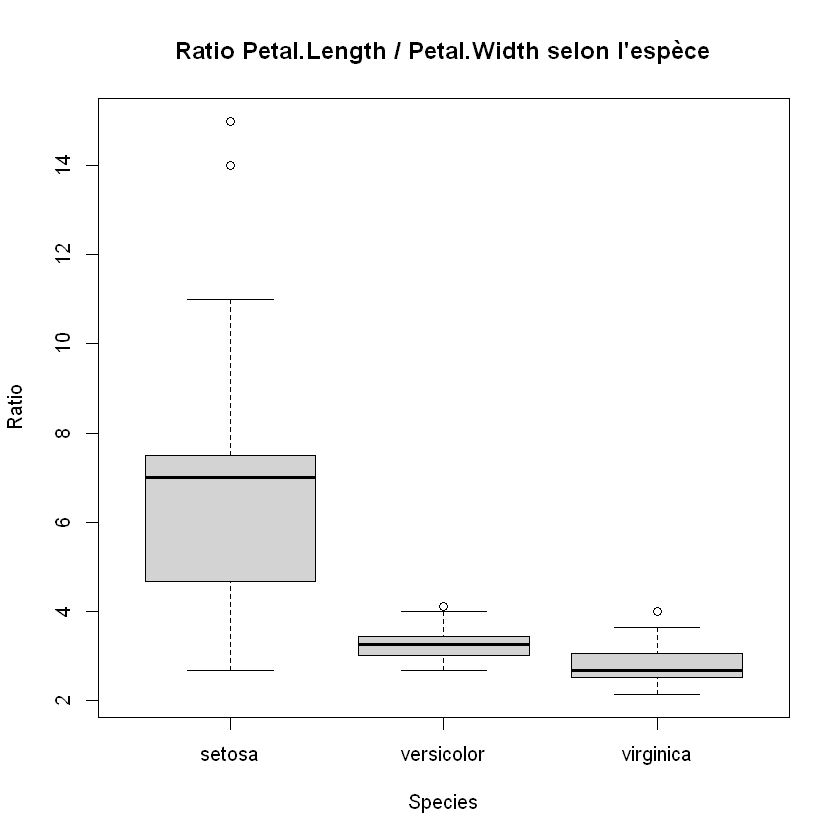

In [16]:
# Créer une nouvelle variable : ratio Petal.Length / Petal.Width
iris$Ratio <- iris$Petal.Length / iris$Petal.Width
head(iris)
#  distribution du ratio par espèce
boxplot(Ratio ~ Species, data = iris,
        main = "Ratio Petal.Length / Petal.Width selon l'espèce")
# statistiques du ratio

aggregate(Ratio ~ Species, data = iris, summary)


### Interprétation du ratio Petal.Length / Petal.Width par espèce

 ➤ Setosa :
     - Ratio très élevé (souvent entre 6 et 8, jusqu’à 15 pour des cas extrêmes)
     - Très faible largeur de pétales combinée à une longueur non négligeable
     - Distribution concentrée et bien distincte → indicateur fort

 ➤ Versicolor :
     - Ratio centré autour de 3.2
     - Variabilité modérée
     - Légère superposition avec Virginica mais distinct de Setosa

 ➤ Virginica :
     - Ratio légèrement inférieur à Versicolor (~2.8 à 4)
     - Distribution légèrement plus étalée


####  Conclusion

 Le ratio `Petal.Length / Petal.Width` est un excellent indicateur pour identifier l’espèce :
  - Il permet une **séparation très nette entre Setosa** et les deux autres
  - Il améliore la lisibilité des différences de proportion pétale long / large
  - Ce ratio peut être utilisé comme **variable dérivée (feature engineering)** dans un modèle de classification



## Étape 4 : Synthèse et Rapport

### Comment identifier les valeurs aberrantes dans le dataset ?
Les boxplots réalisés pour chaque variable (Sepal.Length, Sepal.Width, Petal.Length, Petal.Width) permettent de visualiser les valeurs aberrantes :

Quelques outliers isolés ont été repérés, notamment :

Pour Sepal.Length chez Virginica

Pour Petal.Length chez Setosa (valeur extrême ≈ 1.0)

Le ratio Petal.Length / Petal.Width a révélé des extrêmes élevés (jusqu'à 15) dans Setosa, confirmés visuellement dans son boxplot.

 Conclusion : Les boxplots et le calcul de statistiques comme les min/max ou les quantiles permettent d’identifier efficacement les outliers.

### Quelles sont les relations entre les variables ?
 La matrice de corrélation met en évidence des liens forts :

Petal.Length ↔ Petal.Width : corrélation très forte (r = 0.96)

Sepal.Length est modérément corrélé à Petal.Length et Petal.Width

Sepal.Width est faiblement ou négativement corrélée aux autres variables

 Les scatter plots confirment :

Des liens linéaires marqués entre Petal.Length et Petal.Width

Une séparation naturelle des espèces dans l’espace des pétales

Des recouvrements plus importants pour les sépales

#### Conclusion :  
Les pétales (longueur et largeur) montrent des relations linéaires fortes et une meilleure capacité de discrimination entre espèces.

### Peut-on prédire l’espèce d’une fleur à partir de ses mesures ?
Les analyses visuelles (scatter plots, boxplots, histogrammes empilés) montrent une séparation quasi parfaite entre les espèces selon :

Petal.Length et Petal.Width (très discriminants)

Le ratio Petal.Length / Petal.Width, nouvel indicateur puissant

Les variables des sépales (notamment Sepal.Width) sont moins informatives pour différencier versicolor et virginica.

L’utilisation conjointe des bonnes variables (et du ratio) pourrait permettre d'entraîner un modèle supervisé performant (classification).

 #### Conclusion :  
 Oui, les espèces peuvent être prédites avec précision en utilisant les variables des pétales, en particulier Petal.Length, Petal.Width et leur ratio.

## Pour aller plus loin: proposition de classification des especes:

--- Histogrammes de Petal.Width par espèce ---



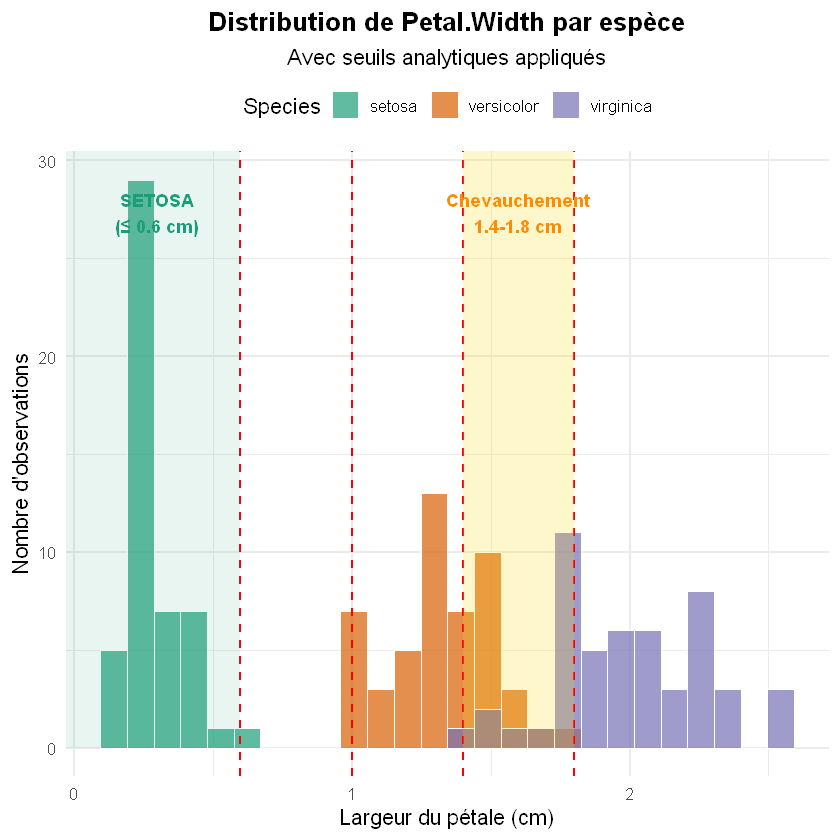

In [17]:
cat("--- Histogrammes de Petal.Width par espèce ---\n\n")


# Filtrer uniquement Petal.Width 
iris_long <- iris %>%
  pivot_longer(cols = -Species, names_to = "Variable", values_to = "Value") %>%
  filter(Variable == "Petal.Width")

# Calcul des bins basé sur l'étendue réelle des données
bin_width <- (max(iris_long$Value) - min(iris_long$Value))/25

# Graphique
iris_long %>%
  ggplot(aes(x = Value, fill = Species)) +
  # Histogramme
  geom_histogram(
    binwidth = bin_width,
    alpha = 0.7,
    position = "identity",
    color = "white",
    boundary = 0
  ) +
  
  # Seuils analytiques
  geom_vline(
    xintercept = c(0.6, 1.0, 1.4, 1.8),
    linetype = "dashed",
    color = "red",
    linewidth = 0.8
  ) +
  
  # Zones critiques
  annotate("rect", 
           xmin = -Inf, xmax = 0.6, 
           ymin = 0, ymax = Inf,
           alpha = 0.1, fill = "#1b9e77") +
  annotate("rect", 
           xmin = 1.4, xmax = 1.8, 
           ymin = 0, ymax = Inf,
           alpha = 0.2, fill = "gold") +
  
  # Annotations
  annotate("text", 
           x = 0.3, y = Inf, 
           label = "SETOSA\n(≤ 0.6 cm)", 
           color = "#1b9e77",
           fontface = "bold",
           vjust = 2) +
  annotate("text", 
           x = 1.6, y = Inf, 
           label = "Chevauchement\n1.4-1.8 cm", 
           color = "darkorange",
           fontface = "bold",
           vjust = 2) +
  
  # Couleurs des espèces
  scale_fill_manual(values = c(
    "setosa" = "#1b9e77", 
    "versicolor" = "#d95f02", 
    "virginica" = "#7570b3"
  )) +
  
  # Titres
  labs(
    title = "Distribution de Petal.Width par espèce",
    subtitle = "Avec seuils analytiques appliqués",
    x = "Largeur du pétale (cm)",
    y = "Nombre d'observations",
  ) +
  
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "top",
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5)
  )

## Analyse du chevauchement selon la variable `Petal.Width`

### Résumé des seuils observés

| Espèce       | Petal.Width minimum | Petal.Width maximum |
|--------------|---------------------|---------------------|
| Setosa       | 0.1 cm              | 0.6 cm              |
| Versicolor   | 1.0 cm              | 1.8 cm              |
| Virginica    | 1.4 cm              | 2.5 cm              |

### Interprétation

- Il n'existe aucun chevauchement entre *Setosa* et les deux autres espèces sur `Petal.Width`. La valeur maximale pour Setosa (0.6 cm) est bien inférieure à la valeur minimale observée pour Versicolor (1.0 cm).
- Un chevauchement partiel est observé entre *Versicolor* et *Virginica*, dans l’intervalle 1.4 cm – 1.8 cm. Cet intervalle constitue une zone d’ambiguïté dans la classification entre ces deux espèces.


### Nettoyage du dataset iris et passage au dataset iris_clean

In [18]:
# Suppression de toutes les outliers
iris_clean <- iris %>%
  slice(-c(23, 24, 42, 44, 99, 107))

In [19]:
# Extraire les fleurs dans la zone de chevauchement (Petal.Width ≥ 1.4)
chevauchement <- iris_clean[iris_clean$Petal.Width >= 1.4, ]

# Afficher un résumé simple des espèces dans la zone de chevauchement
# Nombres de spécimens dans la zone de chevauchement
cat("=== Nombre de spécimens dans la zone de chevauchement ===")
table(chevauchement$Species)

# Règles simples basées uniquement sur Petal.Width
cat("\n=== RÈGLES SIMPLIFIÉES ===\n")
cat("• Petal.Width ≤ 0.6 → SETOSA (certain)\n")
cat("• 1.0 ≤ Petal.Width < 1.4 → VERSICOLOR (certain)\n")
cat("• Petal.Width ≥ 1.4 → VERSICOLOR ou VIRGINICA (zone d’ambiguïté)\n")


=== Nombre de spécimens dans la zone de chevauchement ===


    setosa versicolor  virginica 
         0         22         49 


=== RÈGLES SIMPLIFIÉES ===
• Petal.Width ≤ 0.6 → SETOSA (certain)
• 1.0 ≤ Petal.Width < 1.4 → VERSICOLOR (certain)
• Petal.Width ≥ 1.4 → VERSICOLOR ou VIRGINICA (zone d’ambiguïté)


## Affinage des critères discréminants

In [20]:
iris_ambiguous <- iris_clean %>%
  filter(Petal.Width < 1.8, Petal.Width> 0.6, Petal.Length< 5 )

# Affichage du sous-ensemble ambigu
print(iris_ambiguous)


   Sepal.Length Sepal.Width Petal.Length Petal.Width    Species    Ratio
1           7.0         3.2          4.7         1.4 versicolor 3.357143
2           6.4         3.2          4.5         1.5 versicolor 3.000000
3           6.9         3.1          4.9         1.5 versicolor 3.266667
4           5.5         2.3          4.0         1.3 versicolor 3.076923
5           6.5         2.8          4.6         1.5 versicolor 3.066667
6           5.7         2.8          4.5         1.3 versicolor 3.461538
7           6.3         3.3          4.7         1.6 versicolor 2.937500
8           4.9         2.4          3.3         1.0 versicolor 3.300000
9           6.6         2.9          4.6         1.3 versicolor 3.538462
10          5.2         2.7          3.9         1.4 versicolor 2.785714
11          5.0         2.0          3.5         1.0 versicolor 3.500000
12          5.9         3.0          4.2         1.5 versicolor 2.800000
13          6.0         2.2          4.0         1.

En se basant sur nos analyses et en acceptant d'exclure 3 entrées Versicolor (-6%), un iris est un versicolor:
- Si Petal.Width supérieur à 0,6, et inférieur à 1,8
- Et si Petal.Length est inferieur à 5